<a href="https://colab.research.google.com/github/RutgersGRID/mlnotebooks/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#import matplotlib.animation
from matplotlib.animation import FuncAnimation

import tensorflow as tf
#import tf.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers


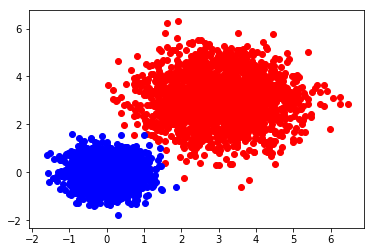

In [0]:

class1center=[3, 3]
class2center=[0, 0]

numsamples=2000

points1=class1center+np.random.randn(numsamples, 2)
points2=class2center+.5*np.random.randn(numsamples, 2)

plt.ion()
fig=plt.figure()
ax=fig.add_subplot(111)#, projection='3d')

#ax.scatter(points1[:, 0], points1[:, 1], points1[:, 2], c='r')
#ax.scatter(points2[:, 0], points2[:, 1], points2[:, 2], c='b')
ax.scatter(points1[:, 0], points1[:, 1], c='r')
ax.scatter(points2[:, 0], points2[:, 1], c='b')

plt.show()
#plt.pause(0.01)

data=np.vstack((points1, points2))
labels=np.vstack((np.ones((numsamples, 1)), np.zeros((numsamples, 1))))

In [0]:
model=Sequential()
model.add(Dense(1, input_dim=2))
model.add(Activation('sigmoid'))
print(model.summary())


W0725 15:03:33.381598 139772750931840 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])


W0725 15:04:10.026079 139772750931840 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#for i in range(0, 50):
def update(i):
    print(i)
    w=model.get_weights()
    a=w[0][0][0]
    b=w[0][1][0]
    c=w[1][0]
  
    x=np.array([-1, 4])
    y=-(a/b)*x-c/b

    ax.clear()
    ax.scatter(points1[:, 0], points1[:, 1], c='r')
    ax.scatter(points2[:, 0], points2[:, 1], c='b')
    ax.plot(x, y, 'g-')
    
    model.fit(data, labels, epochs=1, batch_size=32)
    
ani= FuncAnimation(fig, update, frames=range(0,50),
                                       interval=100, repeat=False)
ani.save('scattergraph.gif', dpi=80, writer='imagemagick')



W0725 15:06:33.328477 139772750931840 animation.py:1136] MovieWriter imagemagick unavailable. Trying to use pillow instead.


0
4000/4000 [==============================] - 1s 269us/sample - loss: 0.3683 - acc: 0.7883
0
4000/4000 [==============================] - 0s 80us/sample - loss: 0.3127 - acc: 0.8637
1
4000/4000 [==============================] - 0s 87us/sample - loss: 0.2700 - acc: 0.9153
2
4000/4000 [==============================] - 0s 76us/sample - loss: 0.2367 - acc: 0.9445
3
4000/4000 [==============================] - 0s 92us/sample - loss: 0.2102 - acc: 0.9655
4
4000/4000 [==============================] - 0s 98us/sample - loss: 0.1889 - acc: 0.9755
5
4000/4000 [==============================] - 0s 94us/sample - loss: 0.1714 - acc: 0.9815
6
4000/4000 [==============================] - 0s 96us/sample - loss: 0.1570 - acc: 0.9862
7
4000/4000 [==============================] - 0s 101us/sample - loss: 0.1448 - acc: 0.9902
8
4000/4000 [==============================] - 0s 90us/sample - loss: 0.1345 - acc: 0.9933
9
4000/4000 [==============================] - 0s 97us/sample - loss: 0.1256 - acc: 0.99

In [0]:
!ls -d $PWD/*

/content/sample_data  /content/scattergraph.gif


<img src='/content/scattergraph.gif' />


In [0]:
from IPython.display import Image
Image('/content/scattergraph.gif')

ValueError: ignored

In [0]:
!sudo apt-get install webp


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  webp
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 78.5 kB of archives.
After this operation, 275 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 webp amd64 0.6.1-2 [78.5 kB]
Fetched 78.5 kB in 1s (53.4 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: 

In [0]:
!gif2webp

Usage:
 gif2webp [options] gif_file -o webp_file
Options:
  -h / -help ............. this help
  -lossy ................. encode image using lossy compression
  -mixed ................. for each frame in the image, pick lossy
                           or lossless compression heuristically
  -q <float> ............. quality factor (0:small..100:big)
  -m <int> ............... compression method (0=fast, 6=slowest)
  -min_size .............. minimize output size (default:off)
                           lossless compression by default; can be
                           combined with -q, -m, -lossy or -mixed
                           options
  -kmin <int> ............ min distance between key frames
  -kmax <int> ............ max distance between key frames
  -f <int> ............... filter strength (0=off..100)
  -metadata <string> ..... comma separated list of metadata to
                           copy from the input to the output if present
                           Valid values: al

In [0]:
!gif2webp /content/scattergraph.gif -o scattergraph.webp


Saved output file (99656 bytes): scattergraph.webp


In [0]:
plt.show()